
Makes a 4-panel plot from my chosen best dates for histogram, or hist by area.

0.      For PAD and YF: choose inner ROI
1.    Choose best dates (in notebook) or multi-temporal hist
2.      Seed with CIR maks lakes (to help YF)
3.      Histograms of EM% binned by AREA

TODO: 
* Plots for all regions aggregated X
* Use GW fraction not EM fraction?
* "n=##" in titles X
* How to do error bars on log-log plots???


In [43]:
## imports
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from python_env import *
from scipy import stats
# from memory_profiler import profile

In [2]:
## User vars
min_size=250 # meters squared
regions=['Daring','Baker','PAD','YFLATS']

## constants
region_labels=dict(zip(
    [
    'daring_21405_17063_010_170614_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp',
    'bakerc_16008_19059_012_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'PAD_170613_mosaic_rcls_lakes.shp',
    'PAD_170908_mosaic_rcls_lakes.shp',
    'PAD_180821_mosaic_rcls_lakes.shp',
    'padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'YFLATS_170621_mosaic_rcls_lakes.shp',
    'YFLATS_170916_mosaic_rcls_lakes.shp',
    'YFLATS_180827_mosaic_rcls_lakes.shp',
    'YFLATS_190914_mosaic_rcls_lakes.shp'
    ],

    [
    'CSD June 2017',
    'CSD Sept 2017',
    'CSB Aug 2018',
    'CSB Sept 2019',
    'PAD June 2017',
    'PAD September 2017',
    'PAD Aug 2018',
    'PAD Sept 2019',
    'YF June 2017',
    'YF Sept 2017',
    'YF Aug 2018',
    'YF Sept 2019'
    ]
))
best_dates=[
    'YFLATS_180827_mosaic_rcls_lakes.shp', 'padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp', 'daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp', 'bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp'
            ]
## load data
plt.style.use('/mnt/d/Dropbox/Python/Matplotlib-rcParams/presentation.mplstyle')

In [10]:
# dynamic I/O
## Save directory for dataframes as excel file
output_excel_dir = os.path.join(output_raster_dir_common_roi, 'combined_excel')
os.makedirs(output_excel_dir, exist_ok=True)
excel_pth_best_dates = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-best-dates.xlsx')
excel_pth_all_12 = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-all-12.xlsx')
excel_pth_all_12_summary = os.path.join(output_raster_dir_common_roi, 'combined_excel', 'lake-based-stats-all-12-summary.xlsx')
excel_pth_all_lakes_all_times_full_roi = os.path.join(output_excel_dir, 'stats_all_lakes_all_times_full_roi.xlsx')

In [4]:
## loop over 4 best dates
lakes_list=[]
lakes_labels=[]
for i, basename in enumerate(best_dates):
    ## dynamic I/O
    filename = os.path.join(shape_dir, basename)
    label = region_labels[basename]
    print('label: '+label)

    ## print
    print(f'\n\n----------------\nInput: {filename}')
    print(f'\t(File {i+1} of {len(best_dates)})\n')

    ## I/O
    lakes = gpd.read_file(filename)
    
    ## compute EM coverage m2
    lakes['em_coverage_m2'] = lakes.area_px_m2 * lakes.em_fractio
    
    ## region
    lakes['region'] = label

    ## filter
    filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size) & (lakes.cir_observ==True)
    
    ## save to mem
    lakes_list.append(lakes[filter])
    lakes_labels.append(label)

label: YF Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/YFLATS_180827_mosaic_rcls_lakes.shp
	(File 1 of 4)

label: PAD Sept 2019


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp
	(File 2 of 4)

label: CSD Sept 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 3 of 4)

label: CSB Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp
	(File 4 of 4)



In [5]:
## loop over all 12 acquisitions (all available data)
lakes_list_all12=[]
lakes_labels_all12=[]
for i, basename in enumerate(region_labels.keys()):
    ## dynamic I/O
    filename = os.path.join(shape_dir, basename)
    label = region_labels[basename]
    print('label: '+label)

    ## print
    print(f'\n\n----------------\nInput: {filename}')
    print(f'\t(File {i+1} of {len(best_dates)})\n')

    ## I/O
    lakes = gpd.read_file(filename)

    ## filter
    filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size) & (lakes.cir_observ==True)
    
    ## save to mem
    lakes_list_all12.append(lakes[filter])
    lakes_labels_all12.append(label)

label: CSD June 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/daring_21405_17063_010_170614_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 1 of 4)

label: CSD Sept 2017


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp
	(File 2 of 4)

label: CSB Aug 2018


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp
	(File 3 of 4)

label: CSB Sept 2019


----------------
Input: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_no_smoothing/bakerc_16008_19059_012_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp
	(File 4 of 4)

label: PAD June 2017


----------------
Input: /mnt/f/PAD2019/classification_training

In [11]:
## Create merged dataset
lakes_all=pd.concat(lakes_list)
lakes_all_all12=pd.concat(lakes_list_all12)

## Save
lakes_all_all12.to_excel(excel_pth_all_lakes_all_times_full_roi)
print(f'Saved as excel: {excel_pth_all_lakes_all_times_full_roi}')

## view
lakes_all.info()

Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi_no_smoothing/combined_excel/stats_all_lakes_all_times_full_roi.xlsx
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4572 entries, 34 to 1551
Data columns (total 12 columns):
label             4572 non-null int64
area_px_m2        4572 non-null float64
perimeter_        4572 non-null float64
em_fractio        4572 non-null float64
fw_fractio        4572 non-null float64
sw_fractio        4572 non-null float64
gw_fractio        4572 non-null float64
edge              4572 non-null int64
cir_observ        4572 non-null int64
geometry          4572 non-null object
em_coverage_m2    4572 non-null float64
region            4572 non-null object
dtypes: float64(7), int64(3), object(2)
memory usage: 464.3+ KB


In [12]:
## set area bins
# lin
nbins=25
max_area_to_plot=lakes_all.area_px_m2.max()/1e6 # max is 34.00001 # original: 5 # km2
bins=np.linspace(0, max_area_to_plot, nbins)
# nMajorTicks=6

## log
bins_log=np.logspace(np.log10(min_size/1e6), np.log10(max_area_to_plot), nbins)
nMajorTicks=6

# ## log with bins based on powers of 10
# nbins=6
# max_area_to_plot=1e1 # km2
# bins_log=np.logspace(-4, np.log10(max_area_to_plot), nbins)
# nMajorTicks=6

# xlims - calc from first few plots, can update.
xlims = (0.00013844046679502208, 61.39825611751433)
bins_log

array([2.50000000e-04, 4.09197973e-04, 6.69771923e-04, 1.09627725e-03,
       1.79437772e-03, 2.93702290e-03, 4.80729526e-03, 7.86854190e-03,
       1.28791656e-02, 2.10805138e-02, 3.45044140e-02, 5.64765450e-02,
       9.24403509e-02, 1.51305617e-01, 2.47655807e-01, 4.05361016e-01,
       6.63491624e-01, 1.08599771e+00, 1.77755224e+00, 2.90948310e+00,
       4.76221834e+00, 7.79476036e+00, 1.27584006e+01, 2.08828466e+01,
       3.41808739e+01])

In [13]:
## Fig 1: EM hist plot
%matplotlib widget
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation

for i, lakes in enumerate(lakes_list):
    
    ## prep
    axi = np.take(ax, i)
    h=axi.hist(lakes.em_fractio, alpha=0.4, color='b', label=label, bins=bins/max_area_to_plot)
    axi.set_ylabel('Lake count')
    axi.set_xlabel('Emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}\nLakes > {min_size} m2 ({min_size/px_area:.0f} px)', fontsize=16)
    
## save fig 1
figname=os.path.join(fig_dir, 'Hists-subplots-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
## Fig 2: Hist plot by area (linear x scale)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=False, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins)
    groups=lakes.groupby(area_bins)
#     h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
    axi.bar(bins[:-1], groups.mean().em_fractio, color='c', align='edge', width=np.diff(bins)) # width=1,  width=0.2
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
#     axi.set_xscale('linear')
#     axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
#     axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
## Fig 2b: Hist plot by area (logx)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
    axi.bar(bins_log[:-1], groups.mean().em_fractio, color='c', align='edge', width=np.diff(bins_log)) # width=1,  width=0.2
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
    axi.set_xscale('log')
#     axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
#     axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-logx-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save xlims for next plot to make it a tapper
xlims=axi.get_xlim()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
## Fig 2c: Hist plot by area (logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio*100, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte coverage (%)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Count')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Area histogram', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['EM fraction', 'Area histogram'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio*100, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # 'c'
ax.set_xlabel('Area ($km^2$)')
ax.set_ylabel('Mean emergent macrophyte coverage (%)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Count')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-all-logx-with-area-hists-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
## Fig 2d: Hist plot by area with summed bins(logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Count')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Area histogram', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Area histogram'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # 'c'
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Count')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
## Fig 2e: Hist plot by area with summed bins and summed area hist bins (logx)
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Lake area ($km^2$)')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Total lake area/bin', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Total lake area/bin'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Lake area ($km^2$)')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-sum-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-sum-min250-max34')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
## Fig 2ev2: Hist plot by area with summed bins and summed area hist bins (logx)
## Compute by binning new field of em_coverage!
color_em_littoral = '#58D918'
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], groups.sum().em_coverage_m2/1e6, color=color_em_littoral,\
              align='edge', width=np.diff(bins_log), label='Emerg. Macr. Area')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axiyy.set_ylabel('Lake area ($km^2$)')
    axiyy.yaxis.label.set_color((0.6, 0.6, 0.6))
    axi.set_title(f'{lakes_labels[i]} (n = {lakes.em_fractio.count()})', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', label='Total lake area/bin', alpha=0.1)
handles = mpatches.Patch(color=color_em_littoral, label='Area histogram') # 'c'
ax2[1,0].legend([handles, handlesyy], ['Emerg. Macr. Area', 'Total lake area/bin'])
plt.legend

## Second plot
fig, ax = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes_all.area_px_m2/1e6, bins_log)
groups=lakes_all.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax.bar(bins_log[:-1], groups.mean().em_fractio * groups.sum().area_px_m2/1e6, color=color_em_littoral,\
          align='edge', width=np.diff(bins_log), label='EM fraction')
ax.set_xlabel('Lake area ($km^2$)')
ax.set_ylabel('Total littoral emergent macrophyte area ($km^2$)')

## y axis 2
axiyyb=ax.twinx()
h1=axiyyb.bar(bins_log[:-1], groups.sum().area_px_m2/1e6, alpha = 0.1, color='black',\
              align='edge', width=np.diff(bins_log), label='Total lake area/bin') 
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
axiyyb.set_ylabel('Lake area ($km^2$)')
axiyyb.yaxis.label.set_color((0.6, 0.6, 0.6))
ax.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax.set_xscale('log')
ax.set_xlim(xlims)

## save fig 2c: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-subplots-logx-with-area-hists-sum-min250-max34-v2')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2cb: by area
figname=os.path.join(fig_dir, 'Hists-by-area-binsum-all-logx-with-area-hists-sum-min250-max34-v2')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
## Fig 2d: Cumulative Hist plot by area (logx)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
    groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
    h=axi.bar(bins_log[:-1], np.cumsum(groups.mean().em_fractio*groups.sum().area_px_m2)/groups.sum().area_px_m2.sum(), color='c', 
              align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # groups.mean().em_fractio.cumsum()/groups.mean().em_fractio.sum() <--- for CDF
    axi.set_xlabel('Cumulative area ($km^2$)')
    axi.set_ylabel('Cumulative mean EM fraction')
    
    ## y axis 2
    axiyy=axi.twinx()
    h1=axiyy.hist(lakes.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, cumulative=True, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
    for j in range(len(axiyy.get_yticklabels())): # clunky way to set color
        axiyy.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xscale('log')
    axi.set_xlim(xlims)

## legend on one plot only
# handles, labels = axi.get_legend_handles_labels()
# handlesyy, labelsyy = axiyy.get_legend_handles_labels() # doesn't work
import matplotlib.patches as mpatches
handlesyy = mpatches.Patch(color='black', alpha=0.1)
handles = mpatches.Patch(color='c')
ax2[1,0].legend([handles, handlesyy], ['EM fraction CDF', 'Area CDF'])
plt.legend

## Second plot
fig2db, ax2db = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
area_bins=pd.cut(lakes.area_px_m2/1e6, bins_log)
groups=lakes.groupby(area_bins)
#     yerr = groups.em_fractio.quantile(0.25) #groups.std().em_fractio #.to_numpy()  #np.vstack((groups.std().em_fractio.to_numpy(), groups.std().em_fractio.to_numpy())).T # MEMORY CRASH HERE... ???
h=ax2db.bar(bins_log[:-1], np.cumsum(groups.mean().em_fractio*groups.sum().area_px_m2)/groups.sum().area_px_m2.sum(), color='c', 
          align='edge', width=np.diff(bins_log), label='EM fraction')#, yerr=confidence) # width=1,  width=0.2 , conf_intervals=confidence # groups.mean().em_fractio.cumsum()/groups.mean().em_fractio.sum() <--- for CDF
ax2db.set_xlabel('Cumulative area ($km^2$)')
ax2db.set_ylabel('Cumulative mean EM fraction')

## Second plot, y axis 2
axiyyb=ax2db.twinx()
h1=axiyyb.hist(lakes_all.area_px_m2/1e6, alpha=0.1, color='black', bins=bins_log, cumulative=True, label='Area histogram') # , histtype='step'
#     axiyy.set_yticklabels([axiyy.get_yticklabels()[i].get_text() for i in range(len(axiyy.get_yticklabels()))], color='b')
for j in range(len(axiyyb.get_yticklabels())): # clunky way to set color
    axiyyb.get_yticklabels()[j].set_color((0.6, 0.6, 0.6))   
ax2db.set_title(f'All (n={len(lakes_all)})', fontsize=16)
ax2db.set_xscale('log')
ax2db.set_xlim(xlims)

## save fig 2d: by area
figname=os.path.join(fig_dir, 'Cum-hists-by-area-subplots-logx-with-area-hists-min250-max34')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

## save fig 2db: by area
figname=os.path.join(fig_dir, 'Cum-hists-by-area-all-logx-with-area-hists-min250-max34')
fig2db.savefig(figname + '.jpg', dpi=300)
fig2db.savefig(figname + '.pdf', dpi=300)

## save xlims for next plot to make it a tapper
xlims=axi.get_xlim()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
area_bins
lakes_all.area_px_m2.max()/1e6

34.1808739105756

In [23]:
groups.em_fractio.describe()
# groups.em_fractio.quantile(0.25)
# groups.std().em_fractio
# dir(groups)
groups.mean().area_px_m2

area_px_m2
(0.00025, 0.000409]    3.289053e+02
(0.000409, 0.00067]    5.748657e+02
(0.00067, 0.0011]      8.647623e+02
(0.0011, 0.00179]      1.486438e+03
(0.00179, 0.00294]     2.374401e+03
(0.00294, 0.00481]     3.674170e+03
(0.00481, 0.00787]     6.744407e+03
(0.00787, 0.0129]      1.065965e+04
(0.0129, 0.0211]       1.675220e+04
(0.0211, 0.0345]       2.774043e+04
(0.0345, 0.0565]       4.498427e+04
(0.0565, 0.0924]       7.168305e+04
(0.0924, 0.151]        1.154819e+05
(0.151, 0.248]         1.915731e+05
(0.248, 0.405]         3.283304e+05
(0.405, 0.663]         4.989937e+05
(0.663, 1.086]         9.659468e+05
(1.086, 1.778]         1.297184e+06
(1.778, 2.909]         1.942426e+06
(2.909, 4.762]         4.218796e+06
(4.762, 7.795]         6.017932e+06
(7.795, 12.758]                 NaN
(12.758, 20.883]                NaN
(20.883, 34.181]       3.418087e+07
Name: area_px_m2, dtype: float64

In [24]:
## Fig 3: Area hist plots
%matplotlib widget
fig3, ax3 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax3, i)
    axi.hist(lakes.area_px_m2/1e6, alpha=0.4, color='g', label=label, bins=bins_log, )
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Count')
    axi.set_yscale('linear')
    axi.set_xscale('log')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xlim(0, max_area_to_plot)

## save fig 3: by area
figname=os.path.join(fig_dir, 'Area-hists-subplots-min250')
fig3.savefig(figname + '.jpg', dpi=300)
fig3.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/ekyzivat/miniconda2/envs/geohackw/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


In [46]:
## Calc various averages for each lake dataframe
for i, lakes in enumerate(lakes_list):
#     print(lakes.em_fractio.mean())
#     indiv_med_df=lakes.median()
    indiv_mean_df=lakes.mean()
    
    ## Weighted averages and Standard error of mean
    for item in [['em_weight_avg', 'em_fractio', 'em_sem'], ['fw_weight_av','fw_fractio', 'fw_sem'], ['sw_weight_avg','sw_fractio', 'sw_sem'], ['gw_weight_avg', 'gw_fractio', 'gw_sem']]:
        indiv_mean_df[item[0]] = np.average(lakes[item[1]], weights=lakes.area_px_m2) # for weighted Average by area within site
        indiv_mean_df[item[2]] = stats.sem(lakes[item[1]]) # standard error of mean
    
    ## Counts and median (EM)
    indiv_mean_df['Count'] = len(lakes) # for weighted average by lake across sites
    indiv_mean_df['em_median'] = lakes.median().em_fractio
    
    ## Calc std dev and IQR for each study area
    indiv_mean_df['em_std'] = lakes.em_fractio.std()
    indiv_mean_df['IQR'] = lakes.em_fractio.quantile(0.75)-lakes.em_fractio.quantile(0.25)
        
    
    if i==0: # first time
        lakes_mean_df=indiv_mean_df
#         lakes_med_df=indiv_med_df
    else:
        lakes_mean_df=pd.concat((lakes_mean_df, indiv_mean_df), axis=1)
#         lakes_med_df=pd.concat((lakes_med_df, indiv_med_df), axis=1)
# lakes.mean()
lakes_mean_df.columns=lakes_labels
lakes_mean_df=lakes_mean_df.T
# display(lakes_med_df)

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.area_px_m2*lakes_mean_df.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df.columns
lakes_mean_df_append = lakes_mean_df_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_append)

## save as excel
lakes_mean_df_append.to_excel(excel_pth_best_dates)
print(f'Saved as excel: {excel_pth_best_dates}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_coverage_m2,...,fw_weight_av,fw_sem,sw_weight_avg,sw_sem,gw_weight_avg,gw_sem,Count,em_median,em_std,IQR
YF Aug 2018,72404.724776,65103.883677,1600.604799,0.282223,0.002201,0.055858,0.224164,0.0,1.0,14581.730908,...,0.017569,0.000737,0.046428,0.002925,0.159980,0.005901,1784.000000,0.170217,0.301821,0.481678
PAD Sept 2019,27278.762014,138935.901885,3895.545007,0.577409,0.000486,0.289624,0.287299,0.0,1.0,78629.638900,...,0.003191,0.000135,0.333392,0.013629,0.229359,0.011237,437.000000,0.571429,0.282644,0.467216
CSD Sept 2017,57584.043544,130963.495283,1410.078884,0.038050,0.000000,0.000571,0.037479,0.0,1.0,1116.941548,...,0.000000,0.000000,0.000197,0.000259,0.008332,0.002938,1975.000000,0.000000,0.132927,0.005235
CSB Aug 2018,22447.555851,249856.868937,3110.381901,0.266021,0.000773,0.056859,0.208389,0.0,1.0,21460.225799,...,0.000435,0.000151,0.022971,0.006571,0.062484,0.009026,376.000000,0.203915,0.228874,0.222594
cnt_wghtd_mean,57580.843176,115804.768921,1861.820105,0.203628,0.000969,0.054401,0.148257,0.0,1.0,15452.748162,...,0.007196,0.000313,0.051956,0.003096,0.093085,0.005388,1621.965442,0.137807,0.221031,0.253176
mn_lk_ar_wghtd_mean,37024.084861,176318.377295,2748.102757,0.290748,0.000691,0.099437,0.190620,0.0,1.0,29720.045910,...,0.002900,0.000179,0.094224,0.006428,0.100853,0.007840,905.275225,0.241807,0.228283,0.260873
unwghtd_mean,44928.771546,146215.037445,2504.152648,0.290926,0.000865,0.100728,0.189333,0.0,1.0,28947.134289,...,0.005299,0.000256,0.100747,0.005846,0.115039,0.007275,1143.000000,0.236390,0.236566,0.294181
tot_lk_ar_wghtd_mean,51125.435351,138526.562320,2038.589246,0.193914,0.000676,0.055833,0.137405,0.0,1.0,16568.983395,...,0.004297,0.000204,0.052588,0.003497,0.076553,0.005620,1473.009941,0.139050,0.204170,0.201295


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi_no_smoothing/combined_excel/lake-based-stats-best-dates.xlsx


In [48]:
## Calc various averages for each lake dataframe in all 12
## Beware final averages, b/c they are influenced by # of acquisitions in their weighting! See MEGA-TABLE.xlsx for manual calcs.
for i, lakes in enumerate(lakes_list_all12):
#     print(lakes.em_fractio.mean())
#     indiv_med_df=lakes.median()
    indiv_mean_df=lakes.mean()
    
    ## Weighted averages and Standard error of mean
    for item in [['em_weight_avg', 'em_fractio', 'em_sem'], ['fw_weight_av','fw_fractio', 'fw_sem'], ['sw_weight_avg','sw_fractio', 'sw_sem'], ['gw_weight_avg', 'gw_fractio', 'gw_sem']]:
        indiv_mean_df[item[0]] = np.average(lakes[item[1]], weights=lakes.area_px_m2) # for weighted Average by area within site
        indiv_mean_df[item[2]] = stats.sem(lakes[item[1]]) # standard error of mean
    
    ## Counts and median (EM)
    indiv_mean_df['Count'] = len(lakes) # for weighted average by lake across sites
    indiv_mean_df['em_median'] = lakes.median().em_fractio
    
    ## Calc std dev and IQR for each study area
    indiv_mean_df['em_std'] = lakes.em_fractio.std()
    indiv_mean_df['IQR'] = lakes.em_fractio.quantile(0.75)-lakes.em_fractio.quantile(0.25)
    
    if i==0: # first time
        lakes_mean_df_all12=indiv_mean_df
#         lakes_med_df=indiv_med_df
    else:
        lakes_mean_df_all12=pd.concat((lakes_mean_df_all12, indiv_mean_df), axis=1)
#         lakes_med_df=pd.concat((lakes_med_df, indiv_med_df), axis=1)
# lakes.mean()
lakes_mean_df_all12.columns=lakes_labels_all12
lakes_mean_df_all12=lakes_mean_df_all12.T

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df_all12, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12, weights=lakes_mean_df_all12.area_px_m2*lakes_mean_df_all12.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12.columns
lakes_mean_df_all12_append = lakes_mean_df_all12_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_all12_append)

## save as excel
lakes_mean_df_all12_append.to_excel(excel_pth_all_12)
print(f'Saved as excel: {excel_pth_all_12}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,...,fw_weight_av,fw_sem,sw_weight_avg,sw_sem,gw_weight_avg,gw_sem,Count,em_median,em_std,IQR
CSD June 2017,50109.293014,140807.571588,1452.448688,0.020058,4.366417e-09,0.000227,0.019831,0.0,1.0,0.011206,...,5.126912e-07,4.366417e-09,0.000372,0.000098,0.010833,0.001798,1918.000000,0.000000,0.079404,0.007017
CSD Sept 2017,57584.043544,130963.495283,1410.078884,0.038050,0.000000e+00,0.000571,0.037479,0.0,1.0,0.008529,...,0.000000e+00,0.000000e+00,0.000197,0.000259,0.008332,0.002938,1975.000000,0.000000,0.132927,0.005235
CSB Aug 2018,22447.555851,249856.868937,3110.381901,0.266021,7.731279e-04,0.056859,0.208389,0.0,1.0,0.085890,...,4.350677e-04,1.514191e-04,0.022971,0.006571,0.062484,0.009026,376.000000,0.203915,0.228874,0.222594
CSB Sept 2019,10470.589947,249205.187207,2656.738799,0.175375,6.156321e-04,0.025474,0.149286,0.0,1.0,0.054632,...,4.176654e-04,1.327077e-04,0.006753,0.004383,0.047461,0.008423,378.000000,0.113175,0.204212,0.135252
PAD June 2017,36208.046110,285404.261333,7159.551175,0.583462,8.577508e-04,0.228774,0.353830,0.0,1.0,0.654698,...,6.883211e-03,2.435056e-04,0.352732,0.014295,0.295082,0.014201,347.000000,0.634966,0.290694,0.491977
PAD September 2017,51508.289438,117938.313019,3440.110609,0.561918,2.589799e-04,0.123874,0.437785,0.0,1.0,0.521366,...,1.465192e-03,1.061773e-04,0.137683,0.008125,0.382218,0.011761,729.000000,0.605150,0.332453,0.607855
PAD Aug 2018,38842.065574,223522.896494,6898.971412,0.619794,1.730698e-03,0.315106,0.302957,0.0,1.0,0.614073,...,1.053374e-02,4.794577e-04,0.393033,0.015531,0.210506,0.012835,366.000000,0.684121,0.298603,0.494107
PAD Sept 2019,27278.762014,138935.901885,3895.545007,0.577409,4.860822e-04,0.289624,0.287299,0.0,1.0,0.565942,...,3.191079e-03,1.349377e-04,0.333392,0.013629,0.229359,0.011237,437.000000,0.571429,0.282644,0.467216
YF June 2017,156266.055824,89624.656034,2222.733859,0.367531,2.404034e-03,0.075206,0.289921,0.0,1.0,0.249006,...,1.174635e-02,5.112292e-04,0.040093,0.002929,0.197167,0.004634,2687.000000,0.318089,0.283524,0.471848
YF Sept 2017,245105.360518,88841.906526,1952.248344,0.334801,3.059424e-03,0.087960,0.243781,0.0,1.0,0.225922,...,1.281811e-02,6.330791e-04,0.054628,0.002988,0.158475,0.004141,2857.000000,0.269663,0.280897,0.453272


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi_no_smoothing/combined_excel/lake-based-stats-all-12.xlsx


In [49]:
## View full df
lakes_mean_df_append

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_coverage_m2,...,fw_weight_av,fw_sem,sw_weight_avg,sw_sem,gw_weight_avg,gw_sem,Count,em_median,em_std,IQR
YF Aug 2018,72404.724776,65103.883677,1600.604799,0.282223,0.002201,0.055858,0.224164,0.0,1.0,14581.730908,...,0.017569,0.000737,0.046428,0.002925,0.159980,0.005901,1784.000000,0.170217,0.301821,0.481678
PAD Sept 2019,27278.762014,138935.901885,3895.545007,0.577409,0.000486,0.289624,0.287299,0.0,1.0,78629.638900,...,0.003191,0.000135,0.333392,0.013629,0.229359,0.011237,437.000000,0.571429,0.282644,0.467216
CSD Sept 2017,57584.043544,130963.495283,1410.078884,0.038050,0.000000,0.000571,0.037479,0.0,1.0,1116.941548,...,0.000000,0.000000,0.000197,0.000259,0.008332,0.002938,1975.000000,0.000000,0.132927,0.005235
CSB Aug 2018,22447.555851,249856.868937,3110.381901,0.266021,0.000773,0.056859,0.208389,0.0,1.0,21460.225799,...,0.000435,0.000151,0.022971,0.006571,0.062484,0.009026,376.000000,0.203915,0.228874,0.222594
cnt_wghtd_mean,57580.843176,115804.768921,1861.820105,0.203628,0.000969,0.054401,0.148257,0.0,1.0,15452.748162,...,0.007196,0.000313,0.051956,0.003096,0.093085,0.005388,1621.965442,0.137807,0.221031,0.253176
mn_lk_ar_wghtd_mean,37024.084861,176318.377295,2748.102757,0.290748,0.000691,0.099437,0.190620,0.0,1.0,29720.045910,...,0.002900,0.000179,0.094224,0.006428,0.100853,0.007840,905.275225,0.241807,0.228283,0.260873
unwghtd_mean,44928.771546,146215.037445,2504.152648,0.290926,0.000865,0.100728,0.189333,0.0,1.0,28947.134289,...,0.005299,0.000256,0.100747,0.005846,0.115039,0.007275,1143.000000,0.236390,0.236566,0.294181
tot_lk_ar_wghtd_mean,51125.435351,138526.562320,2038.589246,0.193914,0.000676,0.055833,0.137405,0.0,1.0,16568.983395,...,0.004297,0.000204,0.052588,0.003497,0.076553,0.005620,1473.009941,0.139050,0.204170,0.201295


In [50]:
## View Data table (format for paper with relevant columns)
# NOte that total lake area-weighted mean is lowest val, followed by count-weighted mean
lakes_mean_df_append[['em_weight_avg', 'em_fractio', 'em_median']]

,em_weight_avg,em_fractio,em_median
YF Aug 2018,0.223976,0.282223,0.170217
PAD Sept 2019,0.565942,0.577409,0.571429
CSD Sept 2017,0.008529,0.038050,0.000000
CSB Aug 2018,0.085890,0.266021,0.203915
cnt_wghtd_mean,0.152237,0.203628,0.137807
mn_lk_ar_wghtd_mean,0.197976,0.290748,0.241807
unwghtd_mean,0.221084,0.290926,0.236390
tot_lk_ar_wghtd_mean,0.133438,0.193914,0.139050


In [51]:
## View full Data table for best dates
lakes_mean_df_append[['em_weight_avg', 'em_fractio', 'perimeter_','area_px_m2']]

,em_weight_avg,em_fractio,perimeter_,area_px_m2
YF Aug 2018,0.223976,0.282223,1600.604799,65103.883677
PAD Sept 2019,0.565942,0.577409,3895.545007,138935.901885
CSD Sept 2017,0.008529,0.038050,1410.078884,130963.495283
CSB Aug 2018,0.085890,0.266021,3110.381901,249856.868937
cnt_wghtd_mean,0.152237,0.203628,1861.820105,115804.768921
mn_lk_ar_wghtd_mean,0.197976,0.290748,2748.102757,176318.377295
unwghtd_mean,0.221084,0.290926,2504.152648,146215.037445
tot_lk_ar_wghtd_mean,0.133438,0.193914,2038.589246,138526.562320


In [52]:
## Calculate averages for the four sites
def firstElement(x):
    return x.split(' ')[0]
lakes_mean_df_all12['tmp'] = lakes_mean_df_all12.index.copy()
lakes_mean_df_all12['Region'] = lakes_mean_df_all12['tmp'].apply(firstElement)
lakes_mean_df_all12_summary = lakes_mean_df_all12.groupby('Region').mean()
# display(lakes_mean_df_all12_summary)

## append summary rows
## count-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.Count, axis=0), columns=['cnt_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary.append(lakes_mean_df_mean_tmp)

## mean-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.area_px_m2, axis=0), columns=['mn_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

## non-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.mean(lakes_mean_df_all12_summary, axis=0), columns=['unwghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

## total-area-weighted
lakes_mean_df_mean_tmp = pd.DataFrame(np.average(lakes_mean_df_all12_summary, weights=lakes_mean_df_all12_summary.area_px_m2*lakes_mean_df_all12_summary.Count, axis=0), columns=['tot_lk_ar_wghtd_mean']).T # Create data frame  with weighted average of all values, weighted by count of lakes
lakes_mean_df_mean_tmp.columns=lakes_mean_df_all12_summary.columns
lakes_mean_df_all12_summary_append = lakes_mean_df_all12_summary_append.append(lakes_mean_df_mean_tmp)

display(lakes_mean_df_all12_summary_append)

## save as excel
lakes_mean_df_all12_summary_append.to_excel(excel_pth_all_12_summary)
print(f'Saved as excel: {excel_pth_all_12_summary}')

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,...,fw_weight_av,fw_sem,sw_weight_avg,sw_sem,gw_weight_avg,gw_sem,Count,em_median,em_std,IQR
CSB,16459.072899,249531.028072,2883.560350,0.220698,6.943800e-04,0.041166,0.178837,0.0,1.0,0.070261,...,4.263666e-04,1.420634e-04,0.014862,0.005477,0.054973,0.008724,377.000000,0.158545,0.216543,0.178923
CSD,53846.668279,135885.533436,1431.263786,0.029054,2.183209e-09,0.000399,0.028655,0.0,1.0,0.009867,...,2.563456e-07,2.183209e-09,0.000284,0.000178,0.009583,0.002368,1946.500000,0.000000,0.106166,0.006126
PAD,38459.290784,191450.343183,5348.544551,0.585646,8.333776e-04,0.239345,0.345468,0.0,1.0,0.589020,...,5.518305e-03,2.410196e-04,0.304210,0.012895,0.279291,0.012508,469.750000,0.623916,0.301098,0.515289
YF,134725.439878,81923.938715,1903.170319,0.309992,2.657041e-03,0.065249,0.242087,0.0,1.0,0.221091,...,1.531905e-02,7.016229e-04,0.041153,0.002903,0.164618,0.005122,2215.250000,0.228370,0.284663,0.442680
cnt_wghtd_mean,85361.763567,125784.205324,2116.708408,0.219941,1.305636e-03,0.054561,0.164074,0.0,1.0,0.162156,...,7.325345e-03,3.436261e-04,0.047963,0.002975,0.106867,0.005015,1808.722946,0.171459,0.211706,0.259974
mn_lk_ar_wghtd_mean,45271.296682,188368.401063,3178.431730,0.298330,8.356148e-04,0.093344,0.204150,0.0,1.0,0.227316,...,3.670216e-03,2.111027e-04,0.099212,0.006220,0.124434,0.008065,956.282557,0.269767,0.226820,0.273831
unwghtd_mean,60872.617960,164697.710852,2891.634751,0.286348,1.046200e-03,0.086540,0.198762,0.0,1.0,0.222560,...,5.315995e-03,2.711770e-04,0.090127,0.005363,0.127116,0.007181,1252.125000,0.252708,0.227118,0.285754
tot_lk_ar_wghtd_mean,69365.998281,145242.966523,2343.279040,0.218057,9.880743e-04,0.059278,0.157791,0.0,1.0,0.162409,...,5.264513e-03,2.577384e-04,0.057621,0.003570,0.099524,0.005558,1578.741367,0.178528,0.201895,0.230373


Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/landcover_raster_burned_subroi_no_smoothing/combined_excel/lake-based-stats-all-12-summary.xlsx


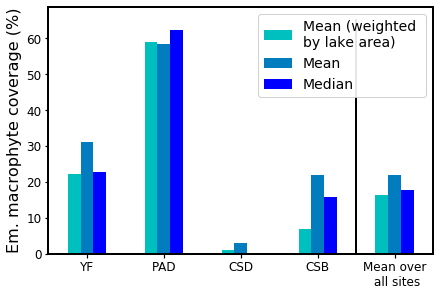

In [53]:
## Plot 4: Mean EM comparison with summary data
%matplotlib inline

# ## colors
# from cycler import cycler
# color_cycle = cycler(c=['r', 'g', 'b'])

fig4, ax4 = plt.subplots(constrained_layout=True) # constrained_layout is now default for presentation
# bar_heights=np.vstack((lakes_mean_df.em_weight_avg, lakes_mean_df.em_fractio))
# ax4.bar(np.arange(4), bar_heights, alpha=0.4, color='g')

lakes_mean_df_all12_summary_append.iloc[[3,2,1,0,7], ][['em_weight_avg', 'em_fractio', 'em_median']].plot.bar(ax=ax4, color = ['c', '#017CBF', 'b'])
# ax4.set_xlabel('Area ($km^2$)')
# ax4.set_ytick_labels([1,2])
# plt.setp(ax4.get_yticklabels(),labels=[1])
plt.gca().set_yticklabels([0,10,20,30,40,50,60]) # Sloopy fix!
ax4.set_xticks(np.arange(5))
labels=[label.split(' ')[0] for label in lakes_labels]
labels.append('Mean over\n all sites')
ax4.set_xticklabels(labels, rotation=0)
ax4.set_ylabel('Em. macrophyte coverage (%)')

## legend
ax4.legend(['Mean (weighted \nby lake area)','Mean','Median'])

## set ylim
ylims=ax4.get_ylim()
# ax4.set_ylim(ylims)

## add separator line
ax4.vlines(3.5, 0, ylims[1], linewidth = [plt.rcParams['axes.linewidth']])

## Save
figname=os.path.join(fig_dir, 'EM-mean-by-region-summary-min250-max34')
fig4.savefig(figname + '.jpg', dpi=300)
fig4.savefig(figname + '.pdf', dpi=300)

### Sanity check
Here, I calculate mean and median of merged dataframe with lakes from all four sites

In [146]:
print('Based on merged dataframe:\n')
print(f'Mean weighted by lake area (total): {np.average(lakes_all.em_fractio, weights=lakes_all.area_px_m2):0.3}')
print(f'Mean (total): {np.mean(lakes_all.em_fractio):0.3}')
print(f'\nSuper median (total): {np.median(lakes_all.em_fractio):0.3}')
print(f'10th percentile (total): {np.quantile(lakes_all.em_fractio, 0.1):0.3}')
print(f'90th percentile (total): {np.quantile(lakes_all.em_fractio, 0.9):0.3}')

Based on merged dataframe:

Mean weighted by lake area (total): 0.132
Mean (total): 0.178

Super median (total): 0.0105
10th percentile (total): 0.0
90th percentile (total): 0.651


### More investigation On the distribution


Mean +/- stdev (%): 
[-9.42262525 44.99153664]

Quantiles (%): 
[ 0.5        65.63525792]

Mean +/- stdev on log transformed and undone (%): 
[ 0.45335485 26.6452279 ]


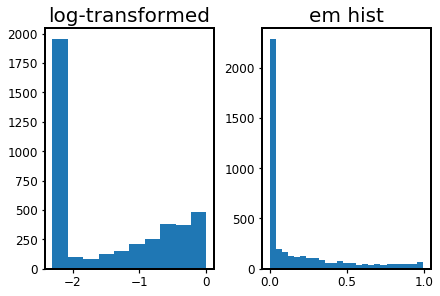

In [253]:
## More investigation On the distribution - from four cherry picked lakes
%matplotlib inline
# lakes_all.em_fractio.plot.hist()
em_transf = np.log10(lakes_all.em_fractio+0.005)
fig, ax = plt.subplots(1, 2)
ax[0].hist(em_transf); ax[0].set_title('log-transformed')
ax[1].hist(lakes_all.em_fractio, bins = 25); ax[1].set_title('em hist')

## mean +/- std
stddev = np.std(lakes_all.em_fractio)
print('\nMean +/- stdev (%): ')
print(100*np.array([lakes_all.em_fractio.mean()-stddev, lakes_all.em_fractio.mean()+stddev]))

## Verify that quantile's of log transformed data set are the same
print('\nQuantiles (%): ')
print(100*10**(np.quantile(em_transf, (0.1, 0.9))))

# Calculate standard deviation on log transformed data
stddev_log = np.std(em_transf)
print('\nMean +/- stdev on log transformed and undone (%): ')
print(100*10**np.array([em_transf.mean()-stddev_log, em_transf.mean()+stddev_log]))


Mean +/- stdev (%): 
[-2.99730883 44.99153664]

Quantiles (%): 
[ 0.5        74.57407407]

Mean +/- stdev on log transformed and undone (%): 
[ 0.88265254 48.71401669]


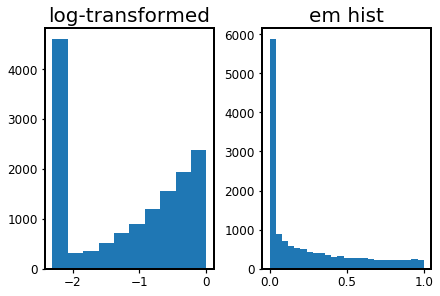

In [252]:
## More investigation On the distribution - average all 12, which is sketchy
%matplotlib inline
# lakes_all.em_fractio.plot.hist()
em_transf = np.log10(lakes_all_all12.em_fractio+0.005)
fig, ax = plt.subplots(1, 2)
ax[0].hist(em_transf); ax[0].set_title('log-transformed')
ax[1].hist(lakes_all_all12.em_fractio, bins = 25); ax[1].set_title('em hist')

## mean +/- std
stddev = np.std(lakes_all.em_fractio)
print('\nMean +/- stdev (%): ')
print(100*np.array([lakes_all_all12.em_fractio.mean()-stddev, lakes_all.em_fractio.mean()+stddev]))

## Verify that quantile's of log transformed data set are the same
print('\nQuantiles (%): ')
print(100*10**(np.quantile(em_transf, (0.1, 0.9))))

# Calculate standard deviation on log transformed data
stddev_log = np.std(em_transf)
print('\nMean +/- stdev on log transformed and undone (%): ')
print(100*10**np.array([em_transf.mean()-stddev_log, em_transf.mean()+stddev_log]))

In [46]:
## Fig 5: A vs EM scatter plots!

%matplotlib widget
fig5, ax5 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
color='#fec89a'
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax5, i)
    axi.scatter(lakes.area_px_m2/1e6, lakes.em_fractio*100, alpha=0.4, color=color)
    axi.set_xlabel('Lake area ($km^2$)')
    axi.set_ylabel('Emergent macrophyte coverage (%)')
    axi.set_yscale('log')
    axi.set_xscale('log')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    axi.set_xlim(1e-4, 4e1) # , max_area_to_plot

## Second plot
f=32 # font size for ASLO presentation
fig5b, ax5b = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
ax5b.scatter(lakes_all.area_px_m2/1e6, lakes_all.em_fractio*100, alpha=0.2, color=color)
ax5b.set_xlabel('Lake area ($km^2$)', fontsize=f)
ax5b.set_ylabel('Em. macrophytes (%)', fontsize=f)
ax5b.set_yscale('log')
ax5b.set_xscale('log')
ax5b.set_xlim(1e-4, 4e1) # , max_area_to_plot
# plt.setp(ax5b.get_xticklabels(), fontsize=f) # works
ax5b.tick_params(labelsize=f-4)
# ax5b.

## save fig 5
figname=os.path.join(fig_dir, 'Area-EM-scatter-subplots-min250-max34')
fig5.savefig(figname + '.jpg', dpi=300)
fig5.savefig(figname + '.pdf', dpi=300)

## save fig 5b
figname=os.path.join(fig_dir, 'Area-EM-scatter-all-min250-max34')
fig5b.savefig(figname + '.jpg', dpi=300)
fig5b.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [271]:
## correlation for this figure
from scipy.stats import pearsonr, spearmanr, linregress # spearman doesn't assume linearity
print('Numpy correlation is {:0.2}'.format(np.corrcoef(lakes_all.area_px_m2, lakes_all.em_fractio)[0,1]**2))
rp, pp = pearsonr(lakes_all.area_px_m2, lakes_all.em_fractio)
print('Pearson correlation is {:0.2} (p = {:0.3})'.format(rp**2, pp))
rs, ps = spearmanr(lakes_all.area_px_m2, lakes_all.em_fractio)
print('Spearman correlation is {:0.2} (p = {:0.3})'.format(rs**2, ps))
linregress(lakes_all.area_px_m2, lakes_all.em_fractio) #ls, li, lr, lp = 

Numpy correlation is 0.00053
Pearson correlation is 0.00053 (p = 0.141)
Spearman correlation is 0.11 (p = 2.63e-107)


LinregressResult(slope=-6.634531695838415e-09, intercept=0.17870111344126324, rvalue=-0.0229585624956505, pvalue=0.14054857545644733, stderr=4.500932351444617e-09)

In [32]:
## Top n lakes calculation
for k in [5, 10, 50, 100, 500]:
    # total area in top 50 lakes 
    a_lake_top50 = lakes_all.sort_values('area_px_m2').area_px_m2.tail(k).sum()/1e6

    # total em area in top 50 lakes
    a_em_top50 = np.sum(lakes_all.sort_values('area_px_m2').area_px_m2.tail(k) * lakes_all.sort_values('area_px_m2').em_fractio.tail(50))/1e6

    # total EM area
    a_em_tot = np.sum(lakes_all.sort_values('area_px_m2').area_px_m2*lakes_all.sort_values('area_px_m2').em_fractio)/1e6

    # total lake area
    a_lake_tot = lakes_all.area_px_m2.sum()/1e6

    print(f'The top {k} lakes hold {a_lake_top50/a_lake_tot:.1%} of the total lake area and {a_em_top50/a_em_tot:.1%} of the total EM area.')

## What size?
# lakes_all.sort_values('area_px_m2').area_px_m2[-100:-99]/1e6

The top 5 lakes hold 20.9% of the total lake area and 2.5% of the total EM area.
The top 10 lakes hold 30.2% of the total lake area and 8.7% of the total EM area.
The top 50 lakes hold 51.3% of the total lake area and 35.3% of the total EM area.
The top 100 lakes hold 62.5% of the total lake area and 35.3% of the total EM area.
The top 500 lakes hold 86.1% of the total lake area and 35.3% of the total EM area.


## Archive

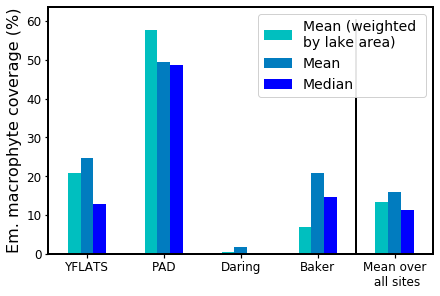

In [245]:
## Plot 4: Mean EM comparison on 4 key dates
%matplotlib inline

# ## colors
# from cycler import cycler
# color_cycle = cycler(c=['r', 'g', 'b'])

fig4, ax4 = plt.subplots(constrained_layout=True) # constrained_layout is now default for presentation
# bar_heights=np.vstack((lakes_mean_df.em_weight_avg, lakes_mean_df.em_fractio))
# ax4.bar(np.arange(4), bar_heights, alpha=0.4, color='g')

lakes_mean_df_append.iloc[[0,1,2,3,7], :][['em_weight_avg', 'em_fractio', 'em_median']].plot.bar(ax=ax4, color = ['c', '#017CBF', 'b'])
# ax4.set_xlabel('Area ($km^2$)')
# ax4.set_ytick_labels([1,2])
# plt.setp(ax4.get_yticklabels(),labels=[1])
plt.gca().set_yticklabels([0,10,20,30,40,50,60]) # Sloopy fix!
ax4.set_xticks(np.arange(5))
labels=[label.split(' ')[0] for label in lakes_labels]
labels.append('Mean over\n all sites')
ax4.set_xticklabels(labels, rotation=0)
ax4.set_ylabel('Em. macrophyte coverage (%)')

## legend
ax4.legend(['Mean (weighted \nby lake area)','Mean','Median'])

## set ylim
ylims=ax4.get_ylim()
# ax4.set_ylim(ylims)

## add separator line
ax4.vlines(3.5, 0, ylims[1], linewidth = [plt.rcParams['axes.linewidth']])

## Save
figname=os.path.join(fig_dir, 'EM-mean-by-region-min250-max34')
fig4.savefig(figname + '.jpg', dpi=300)
fig4.savefig(figname + '.pdf', dpi=300)

# SCRAP

In [28]:
## Add median! [only median of 4 vals...hm]
lakes_mean_df_med = pd.DataFrame(np.median(lakes_mean_df, axis=0)).T
lakes_mean_df_med.columns=lakes_mean_df.columns
lakes_mean_df_med
# lakes_mean_df

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count,em_median
0,13645.266497,156961.391675,2039.250772,0.228495,0.000282,0.043361,0.183756,0.0,1.0,0.139299,1034.5,0.137357


In [152]:
## SCRAP

# lakes_mean_df_append = lakes_mean_df.append(pd.DataFrame(lakes_mean_df.sum()))
# lakes_mean_df_append
([label.split(' ')[0] for label in lakes_labels]).append('All')
labels
ax4.get_xticks()
type(plt.rcParams['axes.linewidth'])
# pd.DataFrame(np.average(lakes_mean_df, weights=lakes_mean_df.Count, axis=0), columns=lakes_mean_df.columns).T #.rename('All')
pd.DataFrame(lakes_mean_df_append[0:-1].mean()).T

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count
0,14011.95083,170707.944513,2364.077686,0.255063,0.000807,0.090582,0.163675,0.0,1.0,0.215413,926.5


In [147]:
## SCRAP

lakes_mean_df
# lakes_mean_df.Count
lakes_mean_df_append

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,em_weight_avg,Count
YFLATS Aug 2018,21299.988932,74557.758431,1474.388578,0.266629,0.002637,0.054272,0.209721,0.0,1.0,0.209361,1536.000000
PAD Sept 2019,10954.664962,170682.978758,3619.403251,0.523086,0.000237,0.271563,0.251286,0.0,1.0,0.577378,391.000000
Daring Sept 2017,16321.135689,182193.575047,1688.450060,0.019698,0.000000,0.000250,0.019448,0.0,1.0,0.005612,1415.000000
Baker Aug 2018,7472.013736,255397.465814,2674.068853,0.210840,0.000353,0.036241,0.174245,0.0,1.0,0.069302,364.000000
0,16949.346195,143558.107904,1900.260503,0.193926,0.001153,0.054800,0.137973,0.0,1.0,0.156638,1253.885051


In [28]:
%matplotlib widget
lakes.em_fractio*100
# plt.scatter(lakes.area_px_m2/1e6, lakes.em_fractio*100, alpha=0.4, color='g')

18      26.046512
21      34.732824
27      18.165468
31      10.378117
35      11.734694
          ...    
1319    19.731650
1320    87.767584
1335    31.154239
1346    32.586786
1347    23.969319
Name: em_fractio, Length: 364, dtype: float64

# Scrap

In [111]:
## Fig 2: Hist plot by area (linear x scale) # old version using object.plt.bar, not plt.bar(...)
%matplotlib widget
fig2, ax2 = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for i, lakes in enumerate(lakes_list):
    axi = np.take(ax2, i)
    area_bins=pd.cut(lakes.area_px_m2/1e6, bins)
    groups=lakes.groupby(area_bins)
    h=groups.mean().em_fractio.plot.bar(ax=axi, width=1, color='c')
#     bar_locs = [groups.mean().em_fractio.index[j].mid for j in range(len(groups))]
#     axi.bar(bar_locs, groups.mean().em_fractio, color='c') # width=1, 
    axi.set_xlabel('Area ($km^2$)')
    axi.set_ylabel('Mean emergent macrophyte fraction')
    axi.set_title(f'{lakes_labels[i]}', fontsize=16)
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticks(axi.get_xticks()[0:nbins+6:nbins//6])
    # axi.set_xticks(np.arange(0,7,1))
    # axi.set_xticklabels([f'{i:.1f}' for i in bins[0:nbins+6:nbins//6]], rotation = 0) # match default histogram formatting
#     axi.set_xscale('linear')
    axi.set_xticks(np.arange(0,nMajorTicks,1)/nMajorTicks*25)
    axi.set_xticklabels(np.arange(0,nMajorTicks,1), rotation = 0) # match default histogram formatting
    
## save fig 2: by area
figname=os.path.join(fig_dir, 'Hists-by-area-subplots')
fig2.savefig(figname + '.jpg', dpi=300)
fig2.savefig(figname + '.pdf', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [124]:
dir(h)
# h.get_xticks()
print(groups.mean().em_fractio)
print(bar_locs)
print(np.diff(bar_locs)) # not evenlyspaced!
lakes_labels[i]
bins
bins[:-1]

area_px_m2
(0.0, 0.208]      0.227983
(0.208, 0.417]    0.152340
(0.417, 0.625]    0.083529
(0.625, 0.833]    0.073672
(0.833, 1.042]    0.057883
(1.042, 1.25]     0.049353
(1.25, 1.458]     0.030674
(1.458, 1.667]    0.089811
(1.667, 1.875]         NaN
(1.875, 2.083]    0.025910
(2.083, 2.292]         NaN
(2.292, 2.5]           NaN
(2.5, 2.708]           NaN
(2.708, 2.917]         NaN
(2.917, 3.125]    0.044272
(3.125, 3.333]         NaN
(3.333, 3.542]         NaN
(3.542, 3.75]          NaN
(3.75, 3.958]          NaN
(3.958, 4.167]    0.027551
(4.167, 4.375]         NaN
(4.375, 4.583]         NaN
(4.583, 4.792]    0.201960
(4.792, 5.0]           NaN
Name: em_fractio, dtype: float64
[0.104, 0.3125, 0.521, 0.729, 0.9375, 1.146, 1.354, 1.5625, 1.771, 1.979, 2.1875, 2.396, 2.604, 2.8125, 3.021, 3.229, 3.4375, 3.646, 3.854, 4.0625, 4.271, 4.479, 4.6875, 4.896]
[0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2085
 0.2085 0.208  0.2085 0.2085 0.208  0.2085 0.2085 0.208  0.2

array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667])